# Lab: Regression Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
x = range(1,11)
x = list(x)
ages = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [3]:
student_data = pd.DataFrame({"StudentID": x, "Age": ages, "Tardies": tardies})
student_data.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

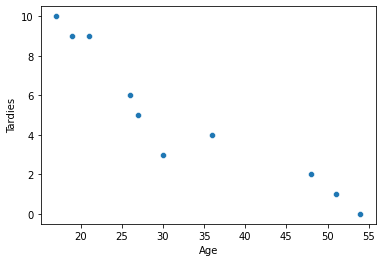

In [4]:
# The Age is the independent variable and the Tardies the dependent. 
# Therefore, Tardies goes in the y axis and the Age in the x. 
sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

##### Answer

The data shows that there is correlation between age and tardiness. In general, y (tardiness) goes down as the x (ages) gets bigger.  

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Covariance is calculated by analyzing the standard deviations from the expected return. 
# or by multiplying the correlation between the two variables by the standard deviation of each variable.
# Positive covariance: Indicates that two variables tend to move in the same direction.
# Negative covariance: Reveals that two variables tend to move in inverse directions.
student_data[['Tardies', 'Age']].cov()

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [6]:
# The correlation expresses the relation between two variables (with a number between 0 and 1). 
# The higher the number, the bigger the correlation. 
student_data[['Tardies', 'Age']].corr()

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(

    X = student_data[["Age"]],
    y = student_data['Tardies']
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [9]:
print(f"The coeficient is {beta_1}")

The coeficient is -0.2428207709159808


In [10]:
print(f"The intercept is {beta_0}")

The intercept is 12.888803363135768


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

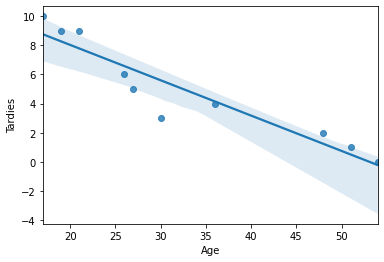

In [11]:
sns.regplot(x = "Age", y = "Tardies", data = student_data)

In [12]:
student_data["Correlation"] = beta_0 + beta_1 * (student_data['Age']).round(2) # This would be the y_hat

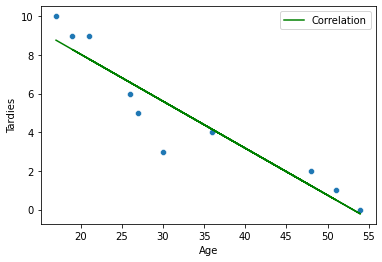

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])
plt.plot(student_data["Age"], student_data["Correlation"], color='g', label = 'Correlation') # This draws the green line
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
results = smf.ols('Tardies ~ Age', data = student_data).fit() 
results.summary()

/Users/unai/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        23:54:41   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Answer

I used a linear regression model, which shows a certain negative correlation between age and tardiness. As people get older they seem to be more punctual, so age is a good predictor of tardiness. However, the dataset is very small, so it is not so trustworthy. 

The intercept or constant, shows the value of Y when X is 0. In this case, the intercept is 12.88. 

The summary shows that the R-squared of the data is 0.882, which means that the 88.2% of the variation of the data is explained by the model.

The p-value is 0.00. Being lower than 0.05 means that the age variable is significant. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
vehicles = pd.read_csv("./vehicles.csv")

In [16]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

##### Answer

In [17]:
vehicles.corr().loc[['CO2 Emission Grams/Mile'], ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,-0.2223,0.752393,0.986189,-0.926229,0.930865


The Year is the variable that has the lowest correlation, so it is not necessary to include it in the model. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

##### Answer

I will use a multiple linear regression model. 

In [18]:
lr2 = LinearRegression()

In [19]:
lr2.fit( X = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']], 
        y = vehicles['CO2 Emission Grams/Mile'])

beta_1_2 = lr2.coef_[0] 
beta_0_2 = lr2.intercept_ 

In [20]:
print(f"The coeficient is {beta_1_2}")

The coeficient is 1.0448363335272952


In [21]:
print(f"The intercept is {beta_0_2}")

The intercept is 131.15632475419625


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
# The Q('XXXX') allows special characters and spaces for the summary

results_vehicles = smf.ols("Q('CO2 Emission Grams/Mile') ~ Cylinders + Q('Fuel Barrels/Year') + Q('Combined MPG') + Q('Fuel Cost/Year')", data = vehicles).fit()
results_vehicles.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('CO2 Emission Grams/Mile')   R-squared:                       0.980
Model:                                      OLS   Adj. R-squared:                  0.980
Method:                           Least Squares   F-statistic:                 4.470e+05
Date:                          Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                                  23:54:41   Log-Likelihood:            -1.5226e+05
No. Observations:                         35952   AIC:                         3.045e+05
Df Residuals:                             35947   BIC:                         3.046e+05
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders                  1.0448      0.080     12.993      0.000       0.887       1.202
Q('Fuel Barrels/Year')    19.6271      0.060    329.809      0.000      19.510      19.744
Q('Combined MPG')         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Q('Fuel Cost/Year')        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

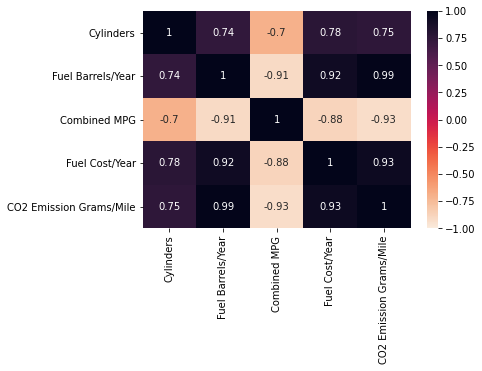

In [23]:
vehicles_plot = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

sns.heatmap(vehicles_plot.corr(), vmin=-1, vmax=1, annot=True, cmap='rocket_r')
plt.show()

##### Answer

I used a linear regression model, which shows a high level of correlation between CO2 emisions and the cylinders, the fuel barrels per year, the combined MPG and the fuel cost per year. 

The intercept or constant, shows the value of Y when X is 0. In this case, the intercept is 131.1563. The summary shows the constant for each variable. 

It also shows that the R-squared of the data is 0.980, which means that the 98% of the variation of the data is explained by the model.

The p-value of all the variables is 0.00. Being lower than 0.05 means that the age variable is significant.

In [24]:
# Multiplying the values instead of summing them gives the data of all possible combinations. 
results_vehicles2 = smf.ols("Q('CO2 Emission Grams/Mile') ~ Cylinders * Q('Fuel Barrels/Year') * Q('Combined MPG') * Q('Fuel Cost/Year')", data = vehicles).fit()
results_vehicles2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('CO2 Emission Grams/Mile')   R-squared:                       0.995
Model:                                      OLS   Adj. R-squared:                  0.995
Method:                           Least Squares   F-statistic:                 5.136e+05
Date:                          Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                                  23:54:41   Log-Likelihood:            -1.2628e+05
No. Observations:                         35952   AIC:                         2.526e+05
Df Residuals:                             35936   BIC:                         2.527e+05
Df Model:                                    15                                         
Covariance Type:                      nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                593.7660     15.883     37.384      0.000     562.635     624.897
Cylinders                                                                -94.0279      2.575    -36.519      0.000     -99.075     -88.981
Q('Fuel Barrels/Year')                                                    13.4461      0.457     29.421      0.000      12.550      14.342
Cylinders:Q('Fuel Barrels/Year')                                           0.2751      0.070      3.942      0.000       0.138       0.412
Q('Combined MPG')                                                         -0.4190      0.161     -2.598      0.009      -0.735      -0.103
Cylinders:Q('Combined MPG')                                               -0.2135      0.040     -5.274      0.000      -0.293      -0.134
Q('Fuel Barrels/Year'):Q('Combined MPG')                                  -1.3641      0.041    -33.019      0.000      -1.445      -1.283
Cylinders:Q('Fuel Barrels/Year'):Q('Combined MPG')                         0.3383      0.006     52.234      0.000       0.326       0.351
Q('Fuel Cost/Year')                                                       -0.2066      0.011    -18.098      0.000      -0.229      -0.184
Cylinders:Q('Fuel Cost/Year')                                              0.0683      0.001     45.929      0.000       0.065       0.071
Q('Fuel Barrels/Year'):Q('Fuel Cost/Year')                                 0.0011   8.98e-05     11.828      0.000       0.001       0.001
Cylinders:Q('Fuel Barrels/Year'):Q('Fuel Cost/Year')                   -6.683e-05   1.08e-05     -6.184      0.000    -8.8e-05   -4.56e-05
Q('Combined MPG'):Q('Fuel Cost/Year')                                     -0.0025      0.000    -10.421      0.000      -0.003      -0.002
Cylinders:Q('Combined MPG'):Q('Fuel Cost/Year')                           -0.0003   3.94e-05     -7.987      0.000      -0.000      -0.000
Q('Fuel Barrels/Year'):Q('Combined MPG'):Q('Fuel Cost/Year')               0.0009    3.6e-05     23.982      0.000       0.001       0.001
Cylinders:Q('Fuel Barrels/Year'):Q('Combined MPG'):Q('Fuel Cost/Year')    -0.0002   4.89e-06    -43.466      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    41212.431   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14111434.311
Skew:                           5.539   Prob(JB):                         0.00
Kurtosis:       

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
party = pd.DataFrame({"X": [1, 3, 4, 6, 8, 9, 11, 14], "Y": [1, 2, 4, 4, 5, 7, 8, 13]})
party.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [26]:
lr3 = LinearRegression()

In [27]:
lr3.fit(X = party[["X"]], 
        y = party["Y"])

beta_1_3 = lr3.coef_[0] 
beta_0_3 = lr3.intercept_ 

In [28]:
beta_1_3

0.8484848484848485

In [29]:
beta_0_3

-0.43939393939393945

<AxesSubplot:xlabel='X', ylabel='Y'>

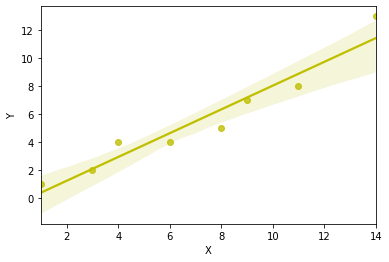

In [51]:
sns.regplot(x = "X", y = "Y", data = party, color="y")

In [31]:
party['Correlation'] = beta_0_3 + beta_1_3 * (party['X']).round(2)

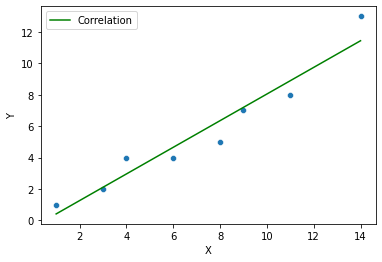

In [32]:
fig, ax = plt.subplots()
sns.scatterplot(x = party["X"], y = party["Y"])
plt.plot(party["X"], party["Correlation"], color='g', label='Correlation') # This draws the green line
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

##### Answer

There is a positive correlation between X and Y. 

In [33]:
party[["X", "Y"]].corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


In [34]:
party[["X", "Y"]].cov()

,X,Y
X,18.857143,16.000000
Y,16.000000,14.571429


In [35]:
results_party = smf.ols("Y ~ X", data = party).fit()
results_party.summary()

/Users/unai/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000102
Time:                        23:54:41   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [36]:
# This way we calculate the error of each value (how far it is from the regression model)
# I am not sure if the distance is from the regression model, I read that it is from the measured value. 
party['Predict_model'] = beta_0_3 + beta_1_3 * party['X'].round()
party['Error'] = (party['Predict_model'] - party['Y']).abs()
party.head()

,X,Y,Correlation,Predict_model,Error
0,1,1,0.409091,0.409091,0.590909
1,3,2,2.106061,2.106061,0.106061
2,4,4,2.954545,2.954545,1.045455
3,6,4,4.651515,4.651515,0.651515
4,8,5,6.348485,6.348485,1.348485


In [39]:
# Create a dataframe without the values which error is higher than 1
party_2 = party[party['Error'] < 1]
party_2

,X,Y,Correlation,Predict_model,Error
0,1,1,0.409091,0.409091,0.590909
1,3,2,2.106061,2.106061,0.106061
3,6,4,4.651515,4.651515,0.651515
5,9,7,7.196970,7.196970,0.196970
6,11,8,8.893939,8.893939,0.893939


<AxesSubplot:xlabel='X', ylabel='Y'>

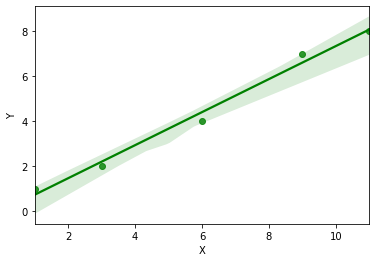

In [44]:
sns.regplot(x = "X", y = "Y", data = party_2, color="g")

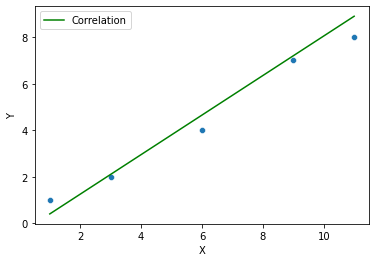

In [43]:
fig, ax = plt.subplots()
sns.scatterplot(x = party_2["X"], y = party_2["Y"])
plt.plot(party_2["X"], party_2["Correlation"], color='g', label='Correlation') # This draws the green line
plt.legend()
plt.show()

In [41]:
results_party_2 = smf.ols("Y ~ X", data = party_2).fit()
results_party_2.summary()

/Users/unai/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     253.4
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000539
Time:                        23:56:18   Log-Likelihood:               -0.99176
No. Observations:                   5   AIC:                             5.984
Df Residuals:                       3   BIC:                             5.202
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0118      0.325     -0.036      0.973      -1.047       1.024
X              0.7353      0.046     15.918      0.001       0.588       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.564
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.471
Skew:                           0.082   Prob(JB):                        0.790
Kurtosis:                       1.505   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
party_2[["X", "Y"]].corr()

,X,Y
X,1.000000,0.994132
Y,0.994132,1.000000


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

##### Answer 

The R-squared increased from 0.932 to 0.988, so the dataset became more representative of the reality. 

The correlation also got higher, from 0.96523 to 0.994132